In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('C:/Users/miant/Desktop/Python/Movies.csv')
dataset.head()

,Production Budget(M),Worldwide Gross Income (M),Genre
0,13,230,action
1,16,224,drama
2,15,221,thriller_suspense
3,14,202,adventure
4,16,198,adventure


In [3]:
#We define the X
X = dataset.iloc[:,[0,1]].values

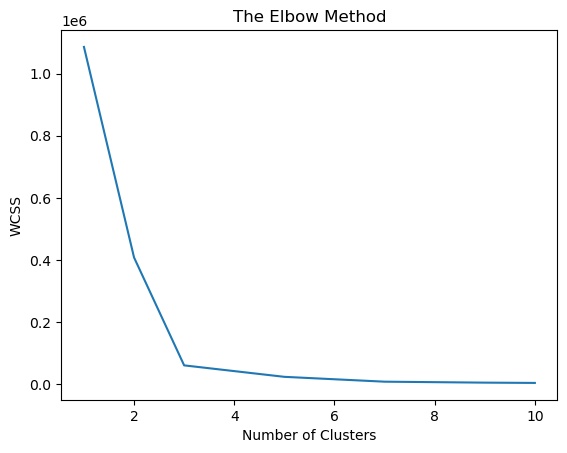

In [4]:
#We conduct the Elbow method to select the best number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
#We create our y
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(X)

In [6]:
#Append the y into the dataset
dataset['Movie_Type'] = y

In [7]:
dataset

,Production Budget(M),Worldwide Gross Income (M),Genre,Movie_Type
0,13,230,action,1
1,16,224,drama,1
2,15,221,thriller_suspense,1
3,14,202,adventure,1
4,16,198,adventure,1
...,...,...,...,...
95,37,16,adventure,0
96,32,19,action,0
97,31,17,action,0
98,26,16,western,0


# We will prepare for classification model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [9]:
#We define X and y

X = dataset.iloc[:, :2].values
y = dataset.iloc[:, -1].values


In [10]:
#Splitting into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#We initialise the classifiers

classifiers = {
    'SVM Classifier': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNN Classifier': KNeighborsClassifier(),
    'Naive Bayes Classifier': GaussianNB()
}

In [13]:
#We train and evalute the models

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
#Print the results
for name, accuracy in results.items():
    print(f"{name}:{accuracy:.2f}")

SVM Classifier:1.00
Random Forest Classifier:1.00
Decision Tree Classifier:1.00
KNN Classifier:1.00
Naive Bayes Classifier:1.00


In [14]:
#We conduct Cross validation with decision tree to see if there is over fitting

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# Initialise the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=0)

In [15]:
# Perform 10-fold cross-validation
scores = cross_val_score(tree_reg, X, y, cv=10, scoring='neg_mean_squared_error')

In [16]:
# Calculate RMSE (Root Mean Squared Error) for each fold
rmse_scores = np.sqrt(-scores)

In [17]:
# Print the results
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean: 0.0
Standard deviation: 0.0
